In [58]:
import ast
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

pd.set_option('display.max_columns', None)

## Lectura dataset

In [59]:
path2= "nuevoMutua.csv"
df = pd.read_csv(path2, dtype=str, header=[0, 1], index_col=0)
df.head(3)

casos_cc                                                             \
       nsin       ncaso pos        nexp          nepi tipo         ccc   
0  29899501  1300298995   1  1300298995  2019E0001248  ANL  0810971910   
1  29901901  1300299019   1  1300299019  2019E0001274   EC  0802448664   
2  29902501  1300299025   1  1300299025  2019E0001281   EC  0803609685   

                                                                              \
  regimen           regccc situacion es_atipico es_recaida     hay_at_previo   
0    0521  0521/0810971910   Cerrado      False      False  No hay AT previo   
1    0521  0521/0802448664   Cerrado      False      False  No hay AT previo   
2    0521  0521/0803609685   Cerrado      False      False  No hay AT previo   

                                                                           \
  duracion dur_previo dur_std   v_std     f_parte     f_graba      f_baja   
0        6        0.0    15.0     9.0  2019-01-04  2019-01-04  2019-01-02   
1      153        0.0    30.0  -123.0  2019-01-04  2019-01-04  2019-01-02   
2       30        0.0    15.0   -15.0  2019-01-04  2019-01-04  2019-01-03   

                                              \
   f_alta_adm  f_alta_med med_clave cie9_cod   
0  2019-01-07  2019-01-07       469    959.8   
1  2019-06-03  2019-06-03       856   726.90   
2  2019-02-01  2019-02-01       222     490.   

                                                               \
                                          cie9_descr dele_cod   
0  TRAUMISMO NO ESPECIF. OTROS SITIOS ESPECIFICAD...      108   
1                   ENTESOPATIA, LUGAR NO LOCALIZADO      108   
2  BRONQUITIS NO ESPECIFICADA COMO AGUDA NI COMO ...      117   

                                                                  \
               dele_nombre d_sem_baja mes_baja es_trafico gestor   
0  DELEGACION DE BARCELONA  MIERCOLES    ENERO      False   1042   
1  DELEGACION DE BARCELONA  MIERCOLES    ENERO      False   1042   
2       DELEGACION DE OLOT     JUEVES    ENERO      False   1021   

                                                                  \
  es_pl_empleado es_pl_activo es_pago_dir es_susp_ext f_susp_ext   
0          False        False       False       False        NaN   
1          False        False        True       False        NaN   
2          False        False        True       False        NaN   

                                                                           \
  es_derecho_cobro es_alta_prev_insp es_recaida_ip_denegada es_covid  mpq   
0             True             False                  False    False  NaN   
1             True             False                  False    False    M   
2             True             False                  False    False  NaN   

   casos_ep                                                             \
  es_atrium f_atrium prop_atrium f_resp_atrium resp_atrium    f_ini_pd   
0     False      NaN         NaN           NaN         NaN         NaN   
1     False      NaN         NaN           NaN         NaN  2019-01-05   
2     False      NaN         NaN           NaN         NaN  2019-01-06   

                             aut                                           \
  motivo_pd nrehab nbio registro ent_at sit_trab UG_TGSS sexo    FECHA_AT   
0       NaN    0.0  0.0       01    007       52  082020    M  2017-07-01   
1  1.2 SETA   16.0  0.0       01    007       01  081111    H  2019-01-01   
2  1.2 SETA    0.0  0.0       01    007       01  170404    H  2019-01-01   

                                                                      \
  OPCION_IT FECHA_OPCION MUTUA_IT FECHA_MUTUA_IT base_coti colectivo   
0      True   2017-07-01      007     2017-07-01   2000.69   0200069   
1      True   1996-01-01      007     2015-01-01    2077.8   0207780   
2      True   2003-02-01      007     2003-02-01    1500.0   0150000   

                                                                            \
  f_alta_o_ss 

In [60]:
# df[('creadas', 'f_baja')] = df[('creadas', 'f_baja')].replace('2099-12-31', np.nan)


convert_dict = {
    ('casos_cc', 'duracion'): float, 
    ('casos_cc', 'dur_previo'): float, 
    ('casos_cc', 'dur_std'): float, 
    ('casos_cc', 'v_std'): float,
    ('casos_ep', 'nrehab'): float, 
    ('casos_ep', 'nbio'): float,
    ('aut', 'base_coti'): float, 
    ('creadas', 'edad'): float, 
    ('creadas', 'naltas'): float,
    ('creadas', 'next_fest'): float, 
    ('creadas', 'past_fest'): float,
    ('creadas', 'nfest_14'): float, 
    ('creadas', 'peso'): float, 
    ('creadas', 'dist_ult_baja'): float,
    ('creadas', 'avg_altas'): float,
    ('creadas', 'alta_oficio'): float,
    ('creadas', 'nrecaidas'): float,
    ('creadas', 'ncasos'): float,
    ('creadas', 'diff_ant_caso'): float,
    ('creadas', 'diff_ant_med_adm'): float,
    ('creadas', 'mean_ant_med_adm'): float,
    ('creadas', 'prev_rechazado'): float

}
df = df.astype(convert_dict)

date_cols = [
    ('casos_cc', 'f_parte'), ('casos_cc', 'f_graba'), ('casos_cc', 'f_baja'), ('casos_cc', 'f_alta_adm'), ('casos_cc', 'f_alta_med'), ('casos_cc', 'f_susp_ext'),
    ('casos_ep', 'f_atrium'), ('casos_ep', 'f_resp_atrium'), ('casos_ep', 'f_ini_pd'), 
    ('aut', 'FECHA_AT'), ('aut', 'FECHA_OPCION'), ('aut', 'FECHA_MUTUA_IT'), ('aut', 'f_alta_o_ss'), ('aut', 'f_cese'), ('aut_fijo', 'f_nacm'),
    ('creadas', 'f_alta'), ('creadas', 'f_baja')

]
for col in date_cols:
    df[col] = pd.to_datetime(df[col], format='%Y-%m-%d').dt.date


df[('aut', 'HORA_PRE')] = pd.to_datetime(df[('aut', 'HORA_PRE')], format='%H:%M:%S').dt.time

In [61]:
df.shape

(10018, 111)

In [62]:
df[('creadas','diff_alta_adm_med')] = (df[('casos_cc','f_alta_adm')] - df[('casos_cc','f_alta_med')]).dt.days

df[('creadas','es_alta_adm_post_med2')] = [1 if i<0 else 0 for i in df[('creadas','diff_alta_adm_med')]]

/tmp/ipykernel_1694/1998782952.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[('creadas','diff_alta_adm_med')] = (df[('casos_cc','f_alta_adm')] - df[('casos_cc','f_alta_med')]).dt.days
/tmp/ipykernel_1694/1998782952.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[('creadas','es_alta_adm_post_med2')] = [1 if i<0 else 0 for i in df[('creadas','diff_alta_adm_med')]]


In [63]:
df.shape

(10018, 113)

In [64]:
def tablas_en_csv(csv,*, verbose=False):
    '''
    Funcion para visualiar el numero de tanlas en el dataframe 
    
    Retorna los nombres de las tablas
    '''
    llaves = list(csv.keys())
    if type(llaves[0]) == tuple:
        llaves = np.array(llaves)
        tablas = set(llaves[:,0])
        if verbose:
            print(f'Hay {len(tablas)} tablas')
        return list(tablas)
    else:
        print(f'El dataset contiene una unica tabla')

In [65]:
tablas = tablas_en_csv(df,verbose=True)
tablas

Hay 7 tablas


['casos_cc',
 'criterios',
 'aut',
 'detectives',
 'aut_fijo',
 'casos_ep',
 'creadas']

In [66]:
tablasdf = dict()
for i in tablas:
    tablasdf[i] = df[i]

## CSV con las variables relevantes

In [70]:
# Dataset con las seleccion de variables y si son categoricas
dat = pd.read_csv("PrimerCategorico3.csv", sep=";")

In [71]:
dat

,historico,registro,ent_at,sit_trab,sexo,FECHA_AT,base_coti,colectivo,N_RED,i_auto,sist_es,i_trade,cese,c2,c4,c5,c10,c12,ncaso,pos,tipo,regimen,es_atipico,es_recaida,hay_at_previo,duracion,dur_previo,dur_std,v_std,med_clave,cie9_cod,d_sem_baja,mes_baja,es_trafico,es_pl_empleado,es_pl_activo,es_pago_dir,es_susp_ext,es_derecho_cobro,es_alta_prev_insp,es_recaida_ip_denegada,mpq,edad,naltas,provincia,next_fest,past_fest,resultado,es_atrium,prop_atrium,resp_atrium,motivo_pd,nrehab,nbio,UG_TGSS,OPCION_IT,FECHA_OPCION,MUTUA_IT,FECHA_MUTUA_IT,f_alta_o_ss,HORA_PRE,nacion,f_trade,cnae9,f_cese,dele,tipo_situ,nsin,nexp,nepi,ccc,regccc,situacion,f_parte,f_graba,f_baja,f_alta_adm,f_alta_med,cie9_descr,dele_cod,dele_nombre,gestor,f_susp_ext,es_covid,f_nacm,f_atrium,f_resp_atrium,f_ini_pd,c1,c3,c6,c7,c8,c9,c11,c13,c14,gr_edad,f_alta,dist_ult_baja,avg_altas,alta_oficio,nrecaidas,ncasos,diff_ant_caso,diff_ant_med_adm,mean_ant_med_adm,prev_rechazado,nfest_14,peso
0,n,n,n,n,y,n,y,n,n,y,y,n,y,y,y,y,y,y,n,n,n,n,y,y,y,y,y,y,y,n,n,y,y,y,y,y,y,y,y,y,y,y,y,y,y,y,y,y,y,y,y,y,y,y,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,y,y,y,y,y,y,y,y,y,n,n
1,n,y,y,y,y,n,n,n,n,y,y,y,y,y,y,y,y,y,n,y,y,y,y,y,y,n,n,n,n,y,y,y,y,y,y,y,y,y,y,y,y,y,n,n,y,n,n,y,y,y,y,y,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,y,n,n,n,n,n,y,n,n


In [72]:
# Union de las tablas en un solo dataset

df = pd.concat(tablasdf.values(), axis=1)

df.shape

(10018, 113)

In [73]:
new = pd.DataFrame({"diff_alta_adm_med":["y","n"],
 "es_alta_adm_post_med2":["y","n"]})

In [74]:
new

,diff_alta_adm_med,es_alta_adm_post_med2
0,y,y
1,n,n


In [75]:
dat = pd.concat([dat,new], axis=1)

In [76]:
dat.shape

(2, 112)

In [234]:
%%time
def selectFromDat(df, dat):
    dataF = dict()
    for key in dat.keys():
        if key in df.keys():
            if list(dat[key])[0] == "n":
                continue
            if list(dat[key])[1] == "n":
                dataF[key] = df[key]
            else:
                dataF[key] = df[key].astype("category")
    
    return pd.DataFrame(dataF)
    
data = selectFromDat(df, dat)

CPU times: user 286 ms, sys: 256 ms, total: 542 ms
Wall time: 532 ms


In [223]:
y = data["resultado"].astype("str")

In [224]:
for i, val in enumerate(y):
    if val == "Sin detective":
        y[i] = -1
    elif val == "NEGA" or val == "CANC" or val == "PEND":
        y[i] = 0
    else:
        y[i] = 1

In [235]:
y.value_counts()


0    7157
1    2861
Name: resultado, dtype: int64

In [81]:
condition = (y == 0) | (y == 1)

In [82]:
Y = y[condition].astype("int")

In [241]:
x = data.drop("resultado", axis=1)

In [106]:
x["es_alta_adm_post_med2"] = x["es_alta_adm_post_med2"].astype("category")

In [236]:
X = x.loc[condition,:]

AttributeError: 'numpy.float64' object has no attribute 'loc'

In [243]:
X = x

In [244]:
X.shape

(10018, 48)

In [245]:
from sklearn.preprocessing import StandardScaler
def scale(data: pd.DataFrame,*,scaler=None):
    '''
    Escalado de los datos 
    
    Funcion que se encarga de escalar los datos correspondites a valores numericos dentro de un dataset.
    Se ha de ajustar los datos unicamete a los valores del train en el train-test split, impidiendo el transbase de información desde
    test a train.
    
    Se retorna el dataset y el scaler.
    
    Si no se pasa un scaler se crea uno 
    '''
    Numdata = data.select_dtypes(include="number")
    if scaler == None:
        print("No hay scaler\nCreando scaler ==> StandardScaler()")
        scaler = StandardScaler()
        scaler.fit(Numdata)
        
    Numdata = pd.DataFrame(scaler.transform(Numdata), columns=Numdata.columns)
    Othdata = data.select_dtypes(exclude="number")
    Othdata = Othdata.reset_index()
    Othdata = Othdata.drop("index", axis=1)
    data = pd.concat([Numdata, Othdata], axis=1)
    return data, scaler
    

In [110]:
X.shape

(687, 50)

In [247]:
Y = y

In [259]:
Y = Y.astype("int")

In [260]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size = 0.8,random_state = 2,shuffle = True)

In [261]:
X_train, scaler = scale(X_train)

No hay scaler
Creando scaler ==> StandardScaler()


In [262]:
X_test, scaler = scale(X_test,scaler=scaler)

## XGBoost Classification

In [114]:
X.dtypes

sexo                      category
base_coti                  float64
i_auto                    category
sist_es                   category
cese                      category
c2                        category
c4                        category
c5                        category
c10                       category
c12                       category
es_atipico                category
es_recaida                category
hay_at_previo             category
duracion                   float64
dur_previo                 float64
dur_std                    float64
v_std                      float64
d_sem_baja                category
mes_baja                  category
es_trafico                category
es_pl_empleado            category
es_pl_activo              category
es_pago_dir               category
es_susp_ext               category
es_derecho_cobro          category
es_alta_prev_insp         category
es_recaida_ip_denegada    category
mpq                       category
edad                

In [115]:
X.es_alta_adm_post_med2

1        0
18       0
25       1
34       1
106      0
        ..
9753     1
9779     0
9784     0
9843     1
10000    1
Name: es_alta_adm_post_med2, Length: 687, dtype: category
Categories (2, int64): [0, 1]

In [263]:
import xgboost as xgb

In [264]:
# Supported tree methods are `gpu_hist`, `approx`, and `hist`.
clf = xgb.XGBClassifier(tree_method="hist",enable_categorical=True )
# X is the dataframe we created in previous snippet
clf.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=True,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [265]:
# Get a graph
graph = xgb.to_graphviz(clf, num_trees=1)
# Or get a matplotlib axis
#ax = xgb.plot_tree(clf, num_trees=1,)
# Get feature importances
clf.feature_importances_

array([1.9863103e-01, 4.9684286e-02, 5.9553084e-05, 1.8082010e-02,
       2.9691352e-02, 1.0992633e-01, 7.4345699e-06, 4.5618981e-02,
       1.6469008e-01, 5.4193556e-06, 0.0000000e+00, 4.8214912e-02,
       9.4226345e-02, 0.0000000e+00, 3.1679351e-06, 3.0260789e-03,
       3.8129210e-02, 7.7041441e-06, 2.9308756e-05, 5.1298066e-05,
       0.0000000e+00, 8.7739266e-03, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 8.8463509e-03, 0.0000000e+00,
       0.0000000e+00, 6.4496521e-06, 6.8284082e-03, 6.8031788e-02,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       9.3639828e-02, 1.3771687e-02, 2.5976885e-06, 1.9141032e-06,
       4.0366153e-06, 0.0000000e+00, 8.5728516e-06, 0.0000000e+00],
      dtype=float32)

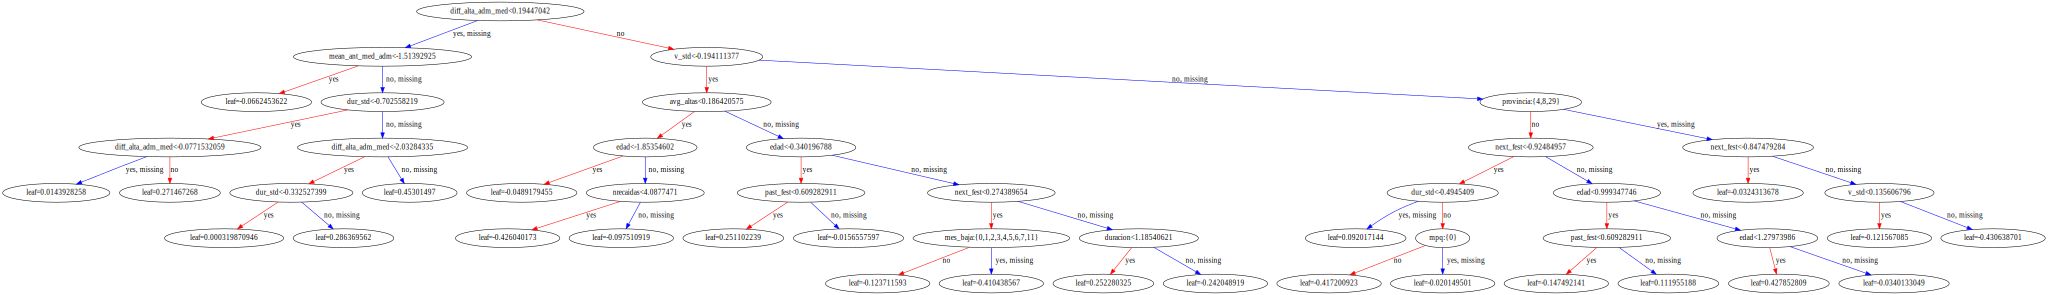

In [119]:
graph

In [266]:
clf.score(X_test,Y_test)

0.6791417165668663

In [258]:
Y_test.value_counts()

0    1419
1     585
Name: resultado, dtype: int64

In [121]:
X.columns

Index(['sexo', 'base_coti', 'i_auto', 'sist_es', 'cese', 'c2', 'c4', 'c5',
       'c10', 'c12', 'es_atipico', 'es_recaida', 'hay_at_previo', 'duracion',
       'dur_previo', 'dur_std', 'v_std', 'd_sem_baja', 'mes_baja',
       'es_trafico', 'es_pl_empleado', 'es_pl_activo', 'es_pago_dir',
       'es_susp_ext', 'es_derecho_cobro', 'es_alta_prev_insp',
       'es_recaida_ip_denegada', 'mpq', 'edad', 'naltas', 'provincia',
       'next_fest', 'past_fest', 'es_atrium', 'prop_atrium', 'resp_atrium',
       'motivo_pd', 'nrehab', 'nbio', 'dist_ult_baja', 'avg_altas',
       'alta_oficio', 'nrecaidas', 'ncasos', 'diff_ant_caso',
       'diff_ant_med_adm', 'mean_ant_med_adm', 'prev_rechazado',
       'diff_alta_adm_med', 'es_alta_adm_post_med2'],
      dtype='object')

In [150]:
y_pred = clf.predict(X_test)

In [123]:
Y_test

2032    0
8465    0
7916    1
6169    1
5953    0
       ..
6489    0
9237    0
3624    1
2509    0
7332    0
Name: resultado, Length: 138, dtype: int64

In [124]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
confusion_matrix(Y_test,y_pred)

array([[52, 18],
       [18, 50]])

In [125]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74        70
           1       0.74      0.74      0.74        68

    accuracy                           0.74       138
   macro avg       0.74      0.74      0.74       138
weighted avg       0.74      0.74      0.74       138



In [126]:
X_sindetective = x.loc[~condition,:]
Y_sindetective = y[~condition]

In [127]:
X_sindetective, scaler = scale(X_sindetective,scaler=scaler)

In [128]:
y_pred_sin = clf.predict(X_sindetective)

In [222]:
%whos

Variable                 Type              Data/Info
----------------------------------------------------
ConfusionMatrixDisplay   type              <class 'sklearn.metrics._<...>.ConfusionMatrixDisplay'>
DetCurveDisplay          type              <class 'sklearn.metrics._<...>t_curve.DetCurveDisplay'>
RocCurveDisplay          type              <class 'sklearn.metrics._<...>c_curve.RocCurveDisplay'>
StandardScaler           type              <class 'sklearn.preproces<...>ng._data.StandardScaler'>
X                        DataFrame               sexo  base_coti i_a<...>\n[687 rows x 50 columns]
X_sindetective           DataFrame               base_coti  duracion<...>n[9331 rows x 50 columns]
X_test                   DataFrame              base_coti  duracion <...>\n[138 rows x 50 columns]
X_train                  DataFrame              base_coti  duracion <...>\n[549 rows x 50 columns]
Y                        Series            1        1\n18       0\n2<...>Length: 687, dtype: int64
Y_s

In [129]:
pd.Series(y_pred_sin).value_counts()

0    6823
1    2508
dtype: int64

In [47]:
import seaborn as sns 

In [ ]:

fig = plt.figure(figsize=(12,10))
sns.stripplot(x = "mes_baja", y = "resultado", data=df, size=3, linewidth=1)

In [130]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [147]:
from sklearn.metrics import DetCurveDisplay, RocCurveDisplay

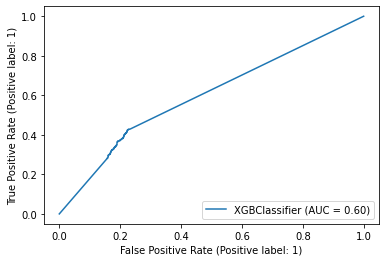

In [267]:
RocCurveDisplay.from_estimator(clf,X_test, Y_test)

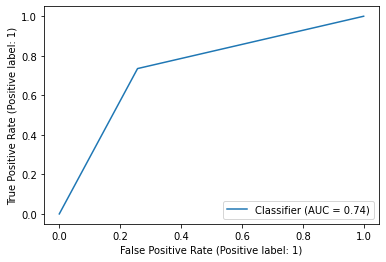

In [152]:
RocCurveDisplay.from_predictions(Y_test, y_pred)

In [202]:
fpr = dict()
tpr = dict()
roc_auc = dict()
y_test = Y_test.to_numpy()

fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# Compute micro-average ROC curve and ROC area
#fpr["micro"], tpr["micro"], _ = roc_curve(y_test, y_pred)
#roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [156]:
_

array([1.99999797e+00, 9.99997973e-01, 9.95283067e-01, 9.95162547e-01,
       9.90250051e-01, 9.89733875e-01, 9.89731967e-01, 9.89515066e-01,
       9.82368290e-01, 9.81737912e-01, 9.70903337e-01, 9.63617921e-01,
       9.46834803e-01, 9.36200798e-01, 9.33389127e-01, 8.99942577e-01,
       8.69615972e-01, 8.12694728e-01, 7.99258649e-01, 7.50688136e-01,
       6.12678051e-01, 5.69446921e-01, 5.57061851e-01, 5.26278853e-01,
       5.10433614e-01, 4.09777761e-01, 3.85748893e-01, 3.29005569e-01,
       2.81875312e-01, 2.80537486e-01, 2.59186566e-01, 2.40356743e-01,
       2.31903806e-01, 1.93548441e-01, 1.92556381e-01, 1.30379513e-01,
       1.20183952e-01, 1.03021033e-01, 1.02400593e-01, 8.42871070e-02,
       7.38300532e-02, 6.30006120e-02, 6.23723045e-02, 4.47867848e-02,
       4.09125537e-02, 1.70286279e-02, 1.65995993e-02, 1.45325605e-02,
       1.41459480e-02, 2.99213594e-03, 2.94725108e-03, 1.69436925e-03],
      dtype=float32)

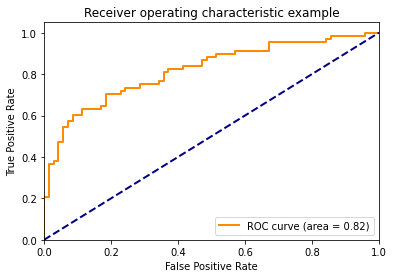

In [203]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([-0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")

#plt.vlines(_,0,1)
plt.show()

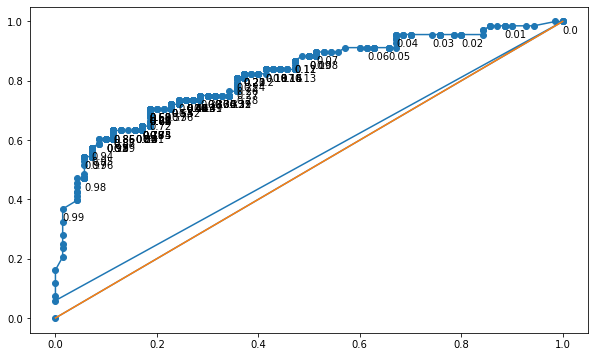

In [218]:
plt.subplots(figsize=(10, 6))
plt.plot(fpr, tpr, 'o-', label="ROC curve")
plt.plot(np.linspace(0,1,10), np.linspace(0,1,10), label="diagonal")
for x, y, txt in zip(fpr[::10], tpr[::10], _[::10]):
    plt.annotate(np.round(txt,2), (x, y-0.04))
#threshold_of_interest = _[np.argmax(tpr - fpr)]

In [165]:
roc_curve()


0.61267805

In [216]:
def roc_casera(clf, y_test, X_test, n_thres):
    fpr, tpr = [1,], [1,]
    thresholds = np.linspace(0.000000000001,0.9999999999,n_thres)
    prob = clf.predict_proba(X_test)[:,1]
    
    for i in thresholds:
        f, t, _ = roc_curve(y_test, list(map(lambda x: 1 if x>i else 0, prob)))
        fpr.append(f[1])
        tpr.append(t[1])
    fpr.append(0)
    tpr.append(0)
    return fpr, tpr, thresholds

In [217]:
fpr, tpr, _ = roc_casera(clf, Y_test, X_test, 1000)

In [204]:
roc_curve(Y_test, y_pred)

(array([0.        , 0.25714286, 1.        ]),
 array([0.        , 0.73529412, 1.        ]),
 array([2, 1, 0]))

In [227]:
y[y==-1] = y_pred_sin 

In [229]:
y.value_counts()

0    7157
1    2861
Name: resultado, dtype: int64

In [232]:
df = df.drop(["diff_alta_adm_med","es_alta_adm_post_med2"], axis=1)

In [233]:
df.shape

(10018, 111)